In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Scatterplot

Text(0, 0.5, 'combined fuel efficiency')

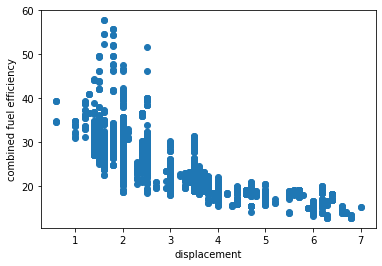

In [3]:
plt.scatter(x = df['displ'], y = df['comb'])
plt.xlabel('displacement')
plt.ylabel('combined fuel efficiency')

Text(0, 0.5, 'combined fuel efficiency')

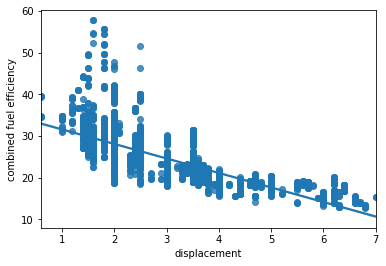

In [4]:
sb.regplot(x = df['displ'], y = df['comb'])
plt.xlabel('displacement')
plt.ylabel('combined fuel efficiency')

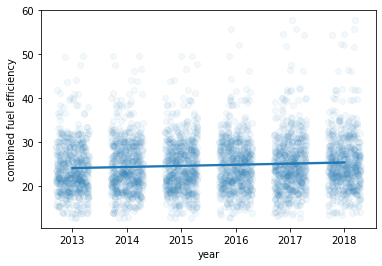

In [5]:
sb.regplot(x = df['year'], y = df['comb'], x_jitter = 0.3, scatter_kws = {'alpha':1/20})
plt.xlabel('year')
plt.ylabel('combined fuel efficiency');

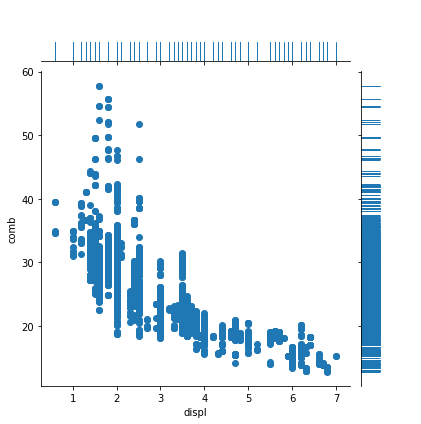

In [26]:
g = sb.JointGrid(data = df, x = 'displ', y = 'comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.35)

### Heat Map

''

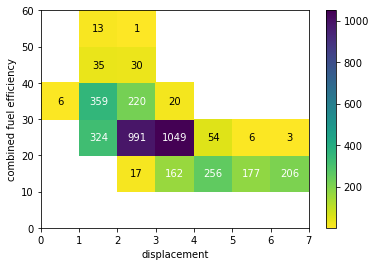

In [6]:
xbins = np.arange(0,df['displ'].max()+0.6, 1)
ybins = np.arange(0,df['comb'].max()+10,10)
h2d = plt.hist2d(x = df['displ'], y = df['comb'], cmin = 0.5 ,cmap = 'viridis_r', bins = [xbins, ybins])
plt.colorbar()
plt.xlabel('displacement')
plt.ylabel('combined fuel efficiency')
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=100:
            plt.text(xbins[i]+0.5, ybins[j]+5, int(c), ha = 'center', va = 'center', color = 'white')
        if c<100:
            plt.text(xbins[i]+0.5, ybins[j]+5, int(c), ha = 'center', va = 'center', color = 'black')
;

In [7]:
df[['comb', 'displ']].describe()

,comb,displ
count,3929.000000,3929.000000
mean,24.791339,2.950573
std,6.003246,1.305901
min,12.821700,0.600000
25%,20.658100,2.000000
50%,24.000000,2.500000
75%,28.227100,3.600000
max,57.782400,7.000000


### Violin Plot

In [19]:
vclasses = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = vclasses)
df['VClass'] = df['VClass'].astype(vclasses)

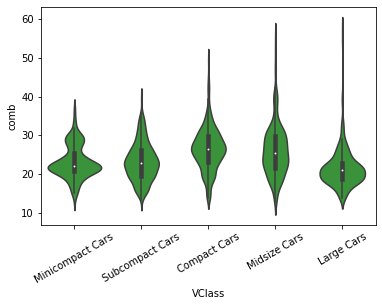

In [20]:
base_color = sb.color_palette()[2]
sb.violinplot(x = df['VClass'], y = df['comb'], color = base_color)
plt.xticks(rotation = 30);

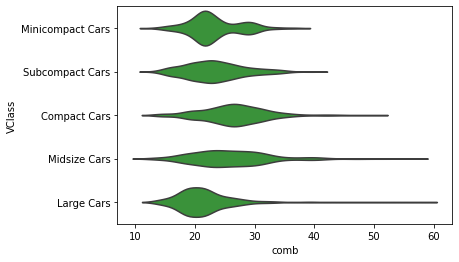

In [21]:
sb.violinplot(y = df['VClass'], x = df['comb'], color = base_color, inner = None)
plt.xticks(rotation = 0);

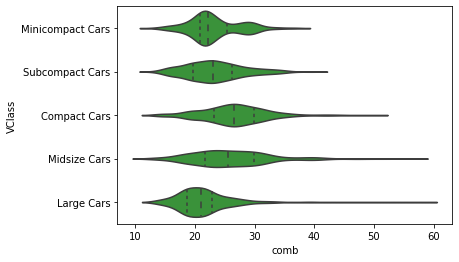

In [25]:
sb.violinplot(y = df['VClass'], x = df['comb'], color = base_color, inner = 'quartile')
plt.xticks(rotation = 0);

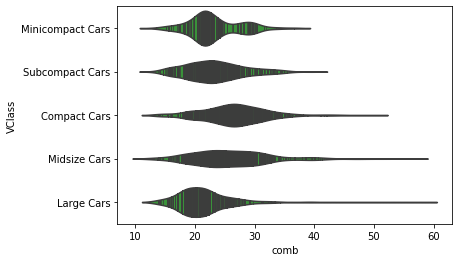

In [27]:
sb.violinplot(y = df['VClass'], x = df['comb'], color = base_color, inner = 'stick')
plt.xticks(rotation = 0);

<AxesSubplot:xlabel='comb', ylabel='VClass'>

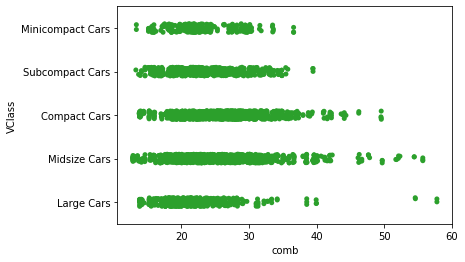

In [28]:
sb.stripplot(y = df['VClass'], x = df['comb'], color = base_color)

C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.6% of the points cannot be plac

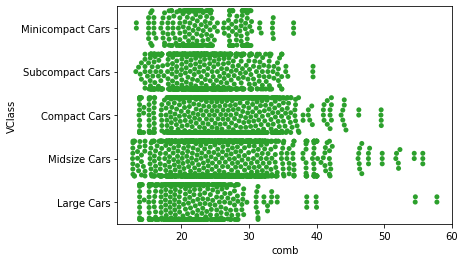

In [20]:
sb.swarmplot(y = df['VClass'], x = df['comb'], color = base_color)
plt.xticks(rotation = 0);

### Boxplot

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

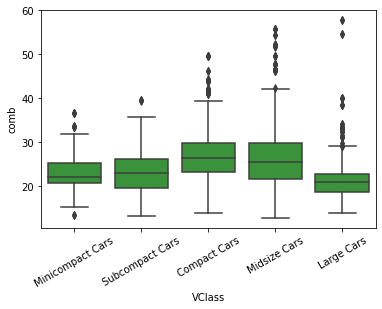

In [39]:
sb.boxplot(y = df['comb'], x = df['VClass'], color = base_color)
plt.xticks(rotation = 30)

<AxesSubplot:xlabel='comb', ylabel='VClass'>

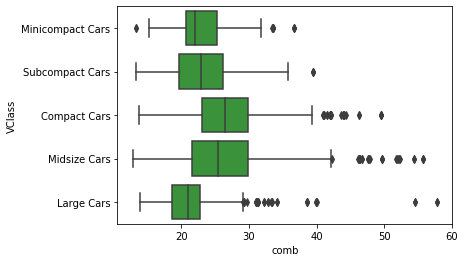

In [23]:
sb.boxplot(x = df['comb'], y = df['VClass'], color = base_color)

### Clustered Bar Chart

In [42]:
df['trans'].unique()

array(['Automatic (AM6)', 'Automatic (AM-S6)', 'Automatic (S6)',
       'Automatic 8-spd', 'Manual 6-spd', 'Automatic 6-spd',
       'Automatic (S5)', 'Automatic 7-spd', 'Automatic (AV-S6)',
       'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S7)', 'Automatic (variable gear ratios)',
       'Manual 5-spd', 'Automatic (AV-S8)', 'Automatic 4-spd',
       'Automatic 5-spd', 'Automatic (AM7)', 'Automatic (AV-S7)',
       'Automatic 9-spd', 'Automatic (AM-S8)', 'Automatic (A1)',
       'Automatic (AM8)', 'Automatic (S9)', 'Automatic (S10)',
       'Automatic (AV-S10)'], dtype=object)

In [43]:
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])
df['trans_type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [52]:
ct_counts = df.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [56]:
ct_counts = ct_counts.reset_index()
ct_counts

,index,VClass,trans_type,count
0,0,Minicompact Cars,Automatic,188
1,1,Minicompact Cars,Manual,133
2,2,Subcompact Cars,Automatic,502
3,3,Subcompact Cars,Manual,171
4,4,Compact Cars,Automatic,784
5,5,Compact Cars,Manual,338
6,6,Midsize Cars,Automatic,989
7,7,Midsize Cars,Manual,199
8,8,Large Cars,Automatic,605
9,9,Large Cars,Manual,20


In [57]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


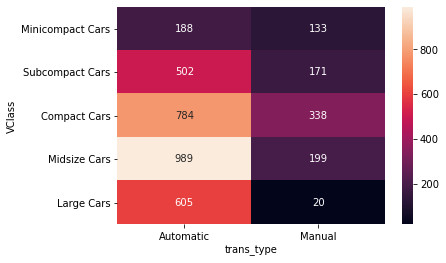

In [59]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');


''

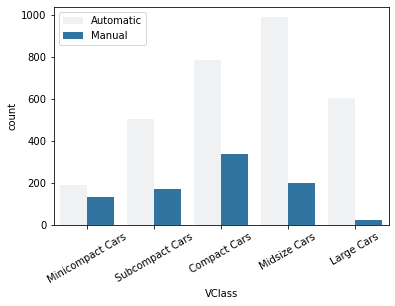

In [68]:
sb.countplot(x = df['VClass'], color = sb.color_palette()[0], hue = df['trans_type'])
plt.xticks(rotation = 30)
plt.legend(loc = 'upper left')
;

### Faceting

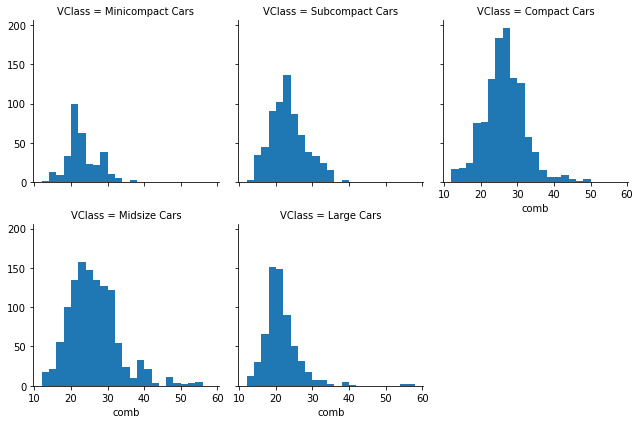

In [73]:
bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data = df, col = 'VClass', col_wrap = 3)
g.map(plt.hist, 'comb', bins = bins);

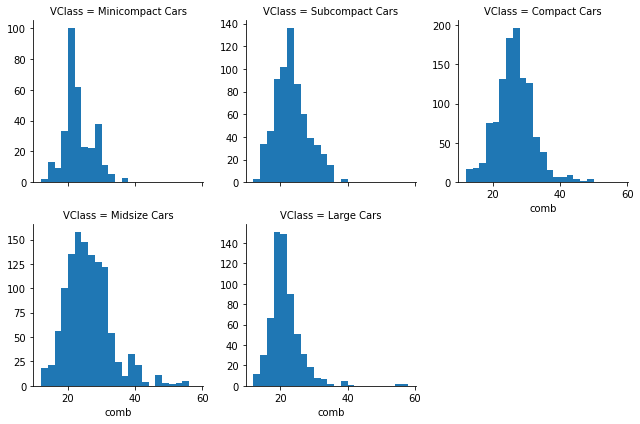

In [75]:
bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data = df, col = 'VClass',sharey = False, col_wrap = 3)
g.map(plt.hist, 'comb', bins = bins);

In [81]:
group_means = df[['trans', 'comb']].groupby(['trans']).mean()
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [83]:
group_order = group_means.sort_values(['comb'], ascending = False).index
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

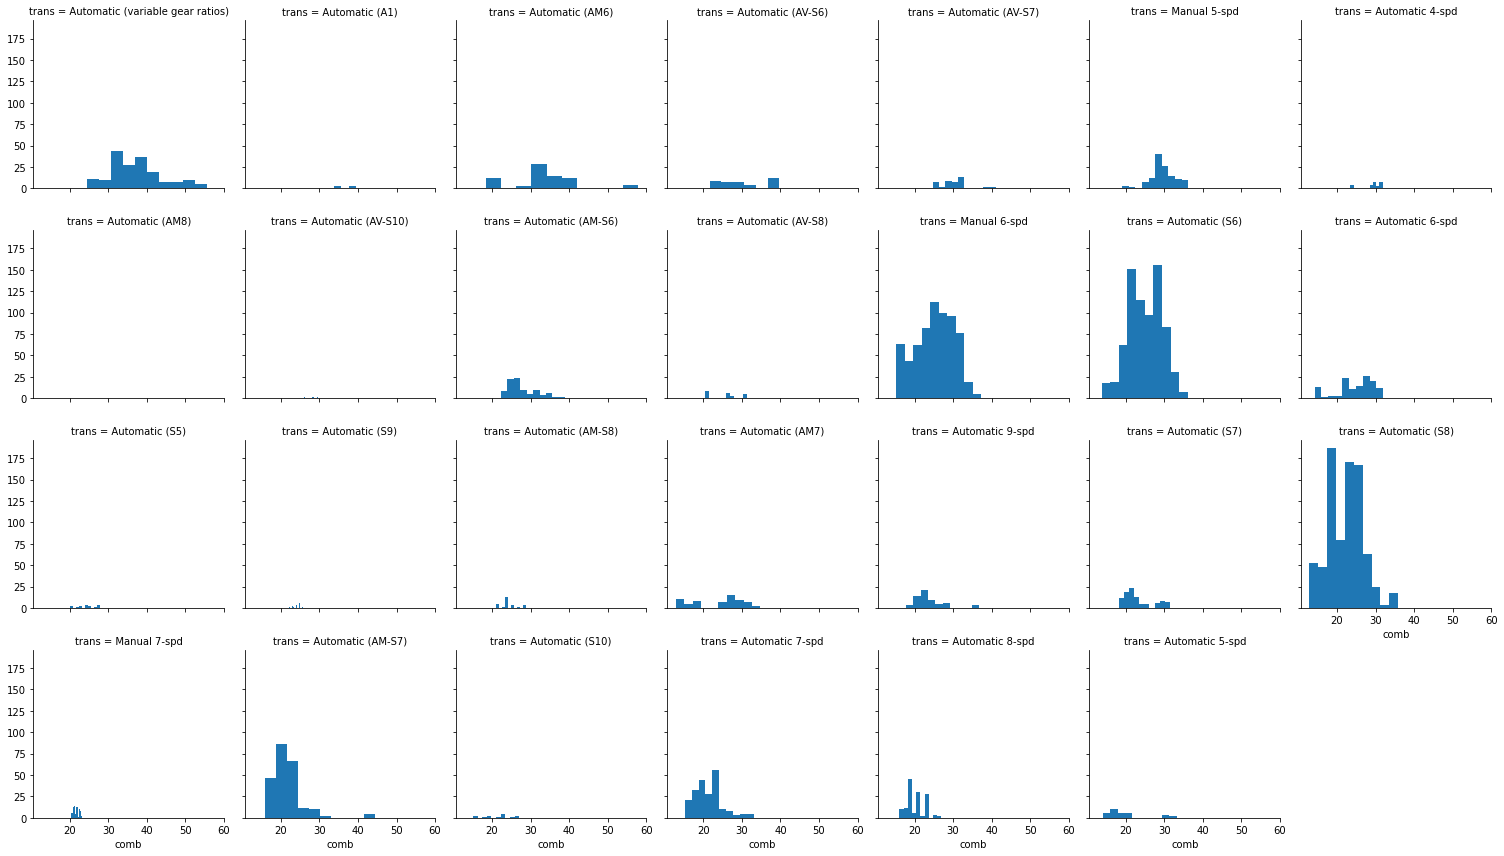

In [85]:
g = sb.FacetGrid(data = df, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

### Adapted Bar Chart

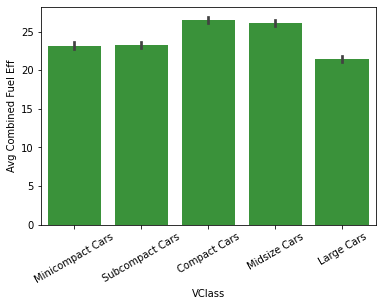

In [87]:
sb.barplot(data = df, x = 'VClass', y = 'comb', color = sb.color_palette()[2])
plt.xticks(rotation = 30)
plt.ylabel('Avg Combined Fuel Eff');

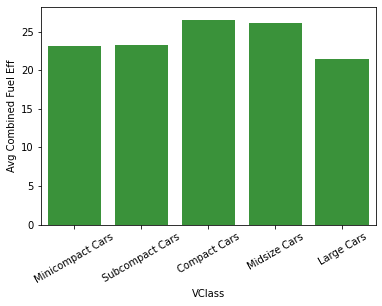

In [89]:
sb.barplot(data = df, x = 'VClass', y = 'comb', color = sb.color_palette()[2], errwidth = 0)
plt.xticks(rotation = 30)
plt.ylabel('Avg Combined Fuel Eff');

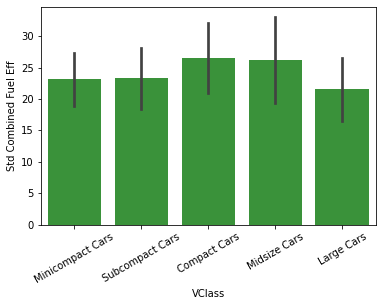

In [92]:
sb.barplot(data = df, x = 'VClass', y = 'comb', color = sb.color_palette()[2], ci = 'sd')
plt.xticks(rotation = 30)
plt.ylabel('Std Combined Fuel Eff');

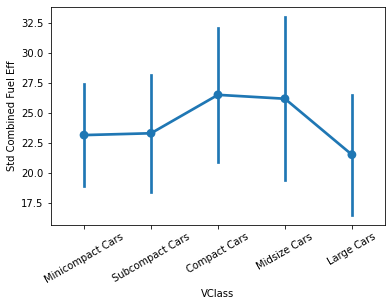

In [93]:
sb.pointplot(data = df, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 30)
plt.ylabel('Std Combined Fuel Eff');

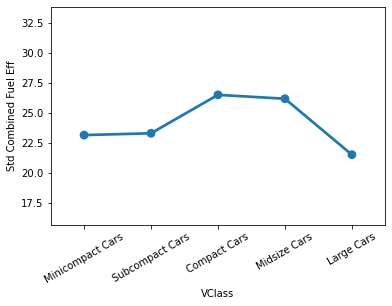

In [94]:
sb.pointplot(data = df, x = 'VClass', y = 'comb', ci = 'sd', errwidth = 0)
plt.xticks(rotation = 30)
plt.ylabel('Std Combined Fuel Eff');

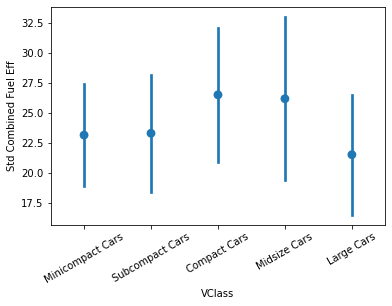

In [96]:
sb.pointplot(data = df, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "")
plt.xticks(rotation = 30)
plt.ylabel('Std Combined Fuel Eff');